---

## Sleep Disorder Detection Project: From Data Cleaning to Streamlit App Deployment

### Project Overview

The goal of this project is to develop a machine learning model that predicts sleep disorders based on various input features such as age, gender, occupation, sleep duration, and more. Additionally, we have created an interactive web application using Streamlit to make these predictions accessible to users. Below, we outline the entire workflow from data cleaning and analysis to model training and deployment.

Dataset Columns:
Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

###Details about Sleep Disorder Column:

-None: The individual does not exhibit any specific sleep disorder.

-Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

-Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

### Data Cleaning and Analysis

1. **Data Import**:
   - We began by importing the sleep disorder dataset, which contains various features related to individuals' sleep patterns, demographics, and health metrics.

2. **Data Cleaning**:
   - **Handling Missing Values**: We checked for and addressed missing values in the dataset. Common strategies included imputing with mean/median for numerical features or mode for categorical features.
   - **Removing Duplicates**: Any duplicate records were identified and removed to ensure data quality.
   - **Outlier Detection and Treatment**: Outliers were detected using statistical methods and were either removed or treated based on their impact on the analysis.

3. **Exploratory Data Analysis (EDA)**:
   - **Descriptive Statistics**: Basic statistics (mean, median, mode, etc.) were computed to understand the distribution of each feature.
   - **Visualizations**: We used various plots (histograms, bar charts, box plots, etc.) to visualize the relationships between features and the target variable (sleep disorder categories).

### Feature Engineering

1. **Encoding Categorical Variables**:
   - Categorical variables such as gender, occupation, and BMI category were encoded using label encoding to convert them into numerical format suitable for machine learning algorithms.

2. **Feature Scaling**:
   - Numerical features were scaled using MinMaxScaler to normalize the data, which helps in improving the performance of many machine learning models.

3. **Creating New Features**:
   - Additional features were engineered based on domain knowledge, such as interaction terms or aggregated features, to capture more information from the existing data.

### Model Training

1. **Train-Test Split**:
   - The cleaned dataset was split into training and testing sets using an 80-20 split ratio. This ensures that we have a separate dataset to evaluate the model's performance.

2. **Model Selection**:
   - We experimented with various machine learning models, including Decision Trees, Random Forests, and Gradient Boosting Machines (GBM). After evaluating their performance, a Decision Tree model was chosen for its balance between simplicity and accuracy.

3. **Model Training**:
   - The Decision Tree model was trained on the training dataset. Hyperparameter tuning was performed using cross-validation to optimize the model's performance.

4. **Model Evaluation**:
   - The model's performance was evaluated on the test set using metrics such as accuracy, precision, recall, and F1-score. Confusion matrices were also used to visualize the classification results.



In [1]:
!pip install scikit-learn==1.2.2


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/content/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Cleaning

In [3]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

# Filling Null values with "no disorder"

In [8]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')


# Differentiating between systolic and diastolic pressure

In [9]:
df['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [10]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


# Dropping unnecessary Column

In [11]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


## Analysis

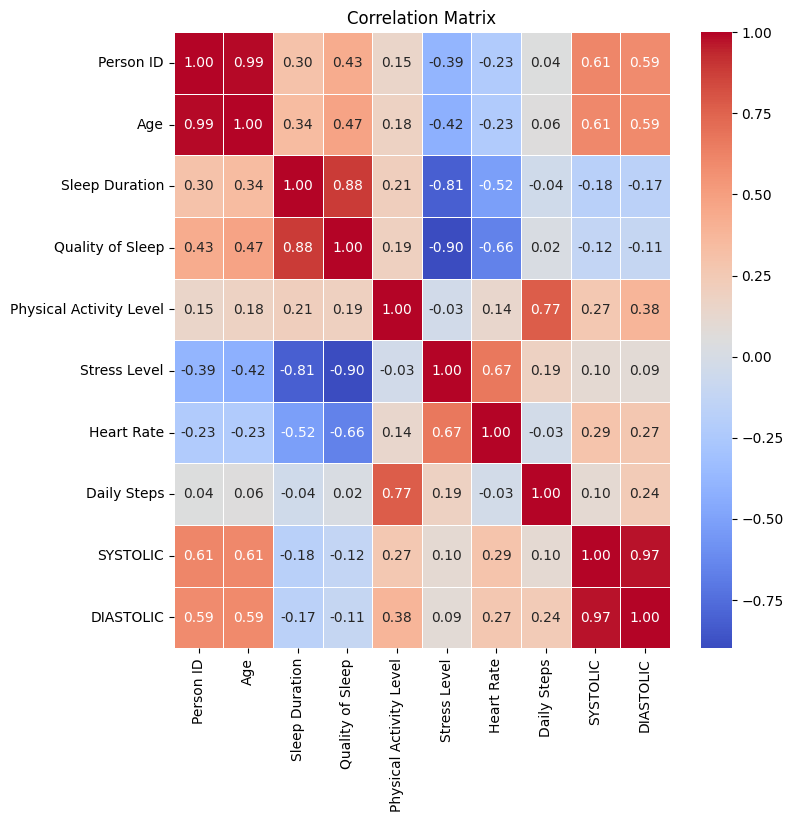

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[num_cols].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
import plotly.express as px

# Assuming 'data' is your DataFrame and it contains a column named 'Sleep Disorder'
fig = px.histogram(data, x='Sleep Disorder', title='Distribution of Sleep Disorder',
                   labels={'Sleep Disorder': 'Sleep Disorder'},
                   color='Sleep Disorder',
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorder",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    bargap=0,  # Set the gap between bars to 0
    bargroupgap=0.1  # Set the gap between groups of bars
)

# Set opacity of the bars
fig.update_traces(opacity=0.75)

fig.show()

In [14]:
fig = px.bar(data, x='Sleep Disorder', color='Gender',
             title='Gender-wise Sleep Disorder Distribution',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Gender': 'Gender', 'count': 'Count'},
             template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Gender-wise Sleep Disorder Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
    barnorm='percent',
)

fig.show()

In [15]:
occupation_counts = data['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

fig = px.bar(occupation_counts, x='Occupation', y='Count',
             title='Distribution of Sleep Disorders by Occupation',
             labels={'Occupation': 'Occupation', 'Count': 'Count'},
             template='plotly_dark',
             text='Count')

fig.update_layout(
    xaxis_title='Occupation',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorders by Occupation",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
)

fig.update_xaxes(tickangle=45)

fig.show()

In [16]:
fig = px.histogram(data, x='Age', color='Sleep Disorder',
                   title='Age Distribution with Sleep Disorder',
                   labels={'Age': 'Age', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title={
        'text': "Age Distribution with Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)

fig.show()

In [17]:
fig = px.scatter(data, x='Sleep Duration', y='Quality of Sleep', color='Sleep Disorder',
                 title='Sleep Duration vs. Quality of Sleep',
                 labels={'Sleep Duration': 'Sleep Duration', 'Quality of Sleep': 'Quality of Sleep'},
                 template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Duration',
    yaxis_title='Quality of Sleep',
    title={
        'text': "Sleep Duration vs. Quality of Sleep",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [18]:
fig = px.scatter(data, x='Physical Activity Level', y='Stress Level', color='Sleep Disorder',
                 title='Stress Level vs. Physical Activity Level',
                 labels={'Physical Activity Level': 'Physical Activity Level', 'Stress Level': 'Stress Level'},
                 template='plotly_dark')

fig.update_layout(
    xaxis_title='Physical Activity Level',
    yaxis_title='Stress Level',
    title={
        'text': "Stress Level vs. Physical Activity Level",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [19]:
fig = px.histogram(data, x='Heart Rate', color='Sleep Disorder',
                   title='Heart Rate Distribution by Sleep Disorder',
                   labels={'Heart Rate': 'Heart Rate', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Heart Rate',
    yaxis_title='Count',
    title={
        'text': "Heart Rate Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [20]:
fig = px.histogram(data, x='Daily Steps', color='Sleep Disorder',
                   title='Daily Steps Distribution by Sleep Disorder',
                   labels={'Daily Steps': 'Daily Steps', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Daily Steps',
    yaxis_title='Count',
    title={
        'text': "Daily Steps Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [21]:
fig = px.scatter(data, x='SYSTOLIC', y='DIASTOLIC', color='Sleep Disorder',
                 title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder',
                 labels={'SYSTOLIC': 'Systolic Blood Pressure', 'DIASTOLIC': 'Diastolic Blood Pressure'},
                 template='plotly_dark')

fig.update_layout(
    xaxis_title='Systolic Blood Pressure',
    yaxis_title='Diastolic Blood Pressure',
    title={
        'text': "Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [22]:
fig = px.histogram(data, x='BMI Category', color='Sleep Disorder',
                   title='BMI Category Distribution by Sleep Disorder',
                   labels={'BMI Category': 'BMI Category', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='BMI Category',
    yaxis_title='Count',
    title={
        'text': "BMI Category Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [23]:
###till here

In [24]:
data.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
304,Female,51,Nurse,6.1,6,90,8,Overweight,75,10000,Sleep Apnea,140.0,95.0
106,Female,37,Nurse,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
61,Male,32,Doctor,6.0,6,30,8,Normal,72,5000,No Disorder,125.0,80.0
191,Male,43,Salesperson,6.4,6,45,7,Overweight,72,6000,Insomnia,130.0,85.0
80,Female,34,Scientist,5.8,4,32,8,Overweight,81,5200,Sleep Apnea,131.0,86.0


## Renaming

In [25]:
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")#replaces all instances of "Normal Weight" with "Normal" in the 'BMI Category' column.

data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [26]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [27]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager'] #less data

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()


Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64

## Encoding

In [28]:
#till

In [29]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
cat_columns = ['Occupation', 'BMI Category', 'Sleep Disorder', 'Gender']

for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# # Save label encoders
# for col, le in label_encoders.items():
#     joblib.dump(le, f'{col}_label_encoder.pkl')

data.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
108,1,37,2,7.8,8,70,4,0,68,7000,1,120.0,80.0
58,1,32,1,6.0,6,30,8,0,72,5000,1,125.0,80.0
323,0,53,2,8.5,9,30,3,0,65,5000,1,125.0,80.0
52,1,32,1,6.0,6,30,8,0,72,5000,1,125.0,80.0
91,1,35,2,7.3,8,60,4,0,65,5000,1,125.0,80.0


In [30]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

## Balancing and scaling

In [31]:
from imblearn.over_sampling import SMOTE

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)


In [32]:
print(pd.Series(y_resampled).value_counts())

Sleep Disorder
1    219
2    219
0    219
Name: count, dtype: int64


## Splitting and Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# # Save the scaler using joblib
# joblib.dump(scaler, 'minmax_scaler_split.pkl')

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8535353535353535
Precision: 0.8534375229290483
Recall: 0.8535353535353535
F1-score: 0.8533523642219295


In [35]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8737373737373737
Precision: 0.8799970484750809
Recall: 0.8737373737373737
F1-score: 0.8746132454501515


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.4, max_depth=8, random_state=1)

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8636363636363636
Precision: 0.8650994067660734
Recall: 0.8636363636363636
F1-score: 0.8637258278055272


In [37]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5858585858585859
Precision: 0.7384415738582405
Recall: 0.5858585858585859
F1-score: 0.5824320853349935


## Hyperparameter tuning finding the best parameters

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the DecisionTreeClassifier with class_weight='balanced'
model = DecisionTreeClassifier(class_weight='balanced')

# Fit the model on the training data
model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8737373737373737
Precision: 0.8746610009321873
Recall: 0.8737373737373737
F1-score: 0.8735966673765716


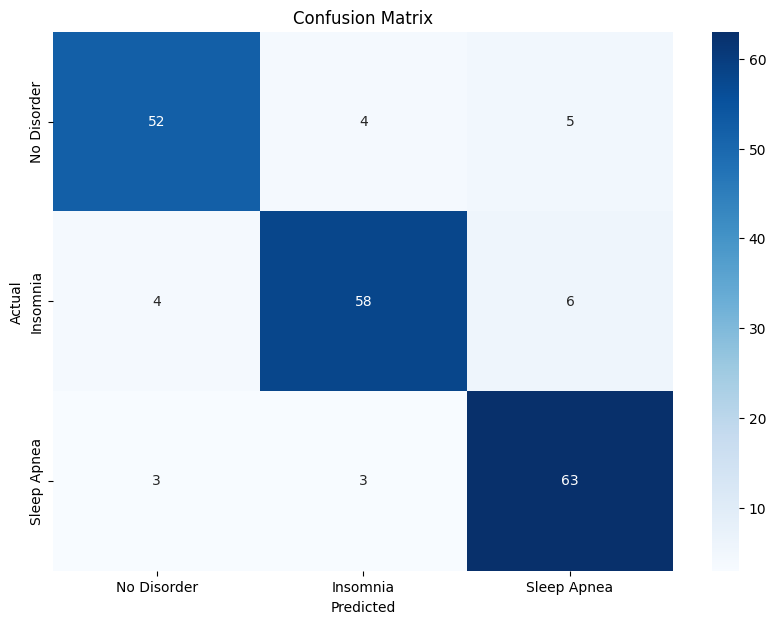

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predictions
def plot_confusion_matrix(y_test, y_pred, classes):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
y_test = y_test
y_pred = Y_pred
classes = ['No Disorder', 'Insomnia', 'Sleep Apnea']
plot_confusion_matrix(y_test, y_pred, classes)


In [40]:
report = classification_report(y_test, y_pred, target_names=classes)
print(report)


              precision    recall  f1-score   support

 No Disorder       0.88      0.85      0.87        61
    Insomnia       0.89      0.85      0.87        68
 Sleep Apnea       0.85      0.91      0.88        69

    accuracy                           0.87       198
   macro avg       0.88      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'class_weight': [
        {0: 1.0, 1: 1.0, 2: 1.0},   # Equal weights
        {0: 3.0, 1: 1.0, 2: 4.0},   # Initial weights
        {0: 2.0, 1: 1.0, 2: 5.0},   # Adjusted weights
        {0: 4.0, 1: 1.0, 2: 3.0}    # Another variation
    ]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5
)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters:", best_params)

# Train the final model with the best parameters
final_model = DecisionTreeClassifier(class_weight=best_params['class_weight'])
final_model.fit(x_train, y_train)

Y_pred_final = final_model.predict(x_test)

accuracy_final = accuracy_score(y_test, Y_pred_final)
precision_final = precision_score(y_test, Y_pred_final, average='weighted')
recall_final = recall_score(y_test, Y_pred_final, average='weighted')
f1_final = f1_score(y_test, Y_pred_final, average='weighted')

print("Final Accuracy:", accuracy_final)
print("Final Precision:", precision_final)
print("Final Recall:", recall_final)
print("Final F1-score:", f1_final)

Best parameters: {'class_weight': {0: 4.0, 1: 1.0, 2: 3.0}}
Final Accuracy: 0.8333333333333334
Final Precision: 0.8396805539382131
Final Recall: 0.8333333333333334
Final F1-score: 0.8333617821572366


In [42]:
# Generate a classification report
report = classification_report(y_test, Y_pred_final,target_names=classes)
print(report)

              precision    recall  f1-score   support

 No Disorder       0.78      0.85      0.81        61
    Insomnia       0.91      0.76      0.83        68
 Sleep Apnea       0.82      0.88      0.85        69

    accuracy                           0.83       198
   macro avg       0.84      0.83      0.83       198
weighted avg       0.84      0.83      0.83       198



In [43]:
# import joblib
# joblib.dump(model, 'model.pkl')
# print("Model saved successfully!")

In [44]:
import sklearn

print(sklearn.__version__)


1.2.2


In [45]:
import pickle

# Assume `model` is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [46]:
import pickle

try:
    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    if hasattr(model, 'predict'):
        print("Model loaded successfully!")
    else:
        print("Loaded object is not a model.")
except Exception as e:
    print(f"Error loading the model: {e}")


Model loaded successfully!
